<center><h1> TD Réseaux de Neurones </h1></center>

Pour ce dernier TD vous allez devoir réaliser 2 modélisations différentes.
Une première pour une régression sur le jeu de données california housing et le second une classification de vêtement.

#### Préambule 

Jouer sur le [tensor sandbox](https://playground.tensorflow.org/) pour voir l'effet des hyperparamètres.


#### Première partie, régression

L'objectif est de jouer sur les hyperparamètres et de regarder l'impact sur les courbes d'apprentissages

1-) Charger le jeu de données Auto MPG disponible sur le site [UCI](https://archive.ics.uci.edu/ml/index.php)

2-) Adapter votre jeu de données pour faire une régression sous Keras

3-) Faites un premier modèle de régression avec Keras en utilisant l'API séquentiel

4-) Tester un modèle wide & deep

5-) Faire une cross-validation avec scikeras pour trouver le meilleur modèle

#### Seconde partie, classification

1-) Charger le jeu de données fashion mnist

2-) Visualiser le contenu du dataset, des images

3-) Transformer les features et créer un jeu de test et d'entrainement

4-) Réaliser des modèles de classification avec keras

In [2]:
#Get package
#On peut toujours faire son pré-processing avec sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import GridSearchCV #RandomizedSearchCV marche aussi

In [5]:
#Import tensorflow and keras
import tensorflow as tf
from tensorflow import keras
from scikeras.wrappers import KerasClassifier, KerasRegressor

## Code

### 1) Import dataset

In [6]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'cylinders', 'displacement', 'horsepower', 'weight',
                'acceleration', 'model_year', 'origin']

df = pd.read_csv(url, 
                 names=column_names,
                 na_values='?', 
                 comment='\t',
                 sep=' ', 
                 skipinitialspace=True
                 )

### 2) Adapter le jeu de données

In [7]:
#On regarde si il y a des NA
df.isna().sum()

#Il y a 6 NA, ici on ne se pose pas la question et on supprime

MPG             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

In [73]:
df_no_na = df.dropna(axis=0)

In [10]:
#Afficher 5 premières lignes
df_no_na.head(5)

,MPG,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


La variable origin semble être de nature catégorielle, il faut la recoder au bon format.
On va utiliser un one hot encoder avec sklearn

In [34]:
df_no_na.origin.value_counts()

origin
1    245
3     79
2     68
Name: count, dtype: int64

In [69]:
#Sk one hot encoder
ohe = OneHotEncoder()
transformed = ohe.fit_transform(df_no_na[['origin']])

In [77]:
one_hot_names = ['origin_1','origin_2','origin_3']
ohe_df = pd.DataFrame(transformed.toarray(), columns=one_hot_names)

In [83]:
#On joint l'encoding puis on supprime le feature de base
df_to_train = df_no_na.join(ohe_df).drop('origin',axis=1).dropna(axis=0)

In [85]:
#Train and test
X_train , X_test, y_train, y_test = train_test_split(df_to_train.iloc[:,1:],
                                                     df_to_train.MPG,
                                                     test_size=0.2)

In [86]:
#Standardiser les features
scaler = StandardScaler()
scaler.fit(X_train)
# On transforme X_train et X_test avec le calcul de moyenne et std du X_train
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

In [87]:
#Clear session and set seed
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [88]:
#Initialisation du modèle
reg_model = keras.models.Sequential()
#Shape input, number of columns
reg_model.add(keras.layers.Input(shape=X_train.shape[1]))#input layer
reg_model.add(keras.layers.Dense(100, activation='relu'))#Hidden layer, 100 neurones
reg_model.add(keras.layers.Dense(1))#Output layer

#Compil model parameter
reg_model.compile(loss=keras.losses.mean_squared_error, 
                  optimizer=keras.optimizers.Adam(learning_rate=0.01)
                 )
#Fit model


In [95]:
history = reg_model.fit(X_train_sc, y_train, batch_size=2, epochs=50, validation_split=0.2)

Epoch 1/50
123/123 [==============================] - 0s 3ms/step - loss: 9.5689 - val_loss: 10.7831
Epoch 2/50
123/123 [==============================] - 0s 3ms/step - loss: 12.4662 - val_loss: 23.7758
Epoch 3/50
123/123 [==============================] - 0s 3ms/step - loss: 8.4048 - val_loss: 11.2440
Epoch 4/50
123/123 [==============================] - 0s 3ms/step - loss: 8.2067 - val_loss: 15.1553
Epoch 5/50
123/123 [==============================] - 0s 2ms/step - loss: 7.5775 - val_loss: 12.8387
Epoch 6/50
123/123 [==============================] - 0s 3ms/step - loss: 7.9875 - val_loss: 10.5398
Epoch 7/50
123/123 [==============================] - 0s 2ms/step - loss: 7.4357 - val_loss: 10.0995
Epoch 8/50
123/123 [==============================] - 0s 3ms/step - loss: 8.5369 - val_loss: 8.7974
Epoch 9/50
123/123 [==============================] - 0s 2ms/step - loss: 7.3936 - val_loss: 9.0382
Epoch 10/50
123/123 [==============================] - 0s 2ms/step - loss: 5.8067 - val_loss

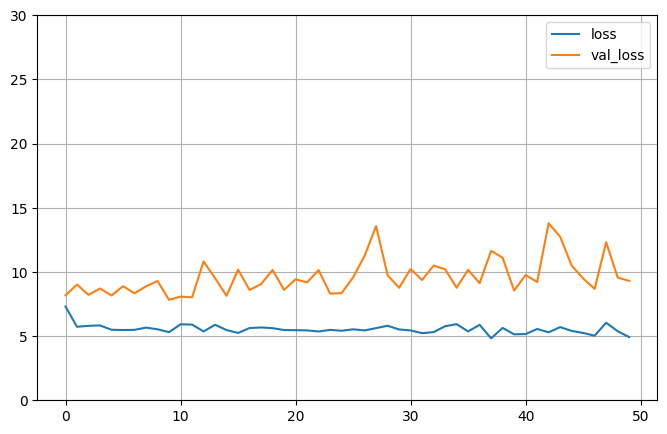

In [94]:
import matplotlib.pyplot as plt

#Data to pandas dataframe
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 30) 
plt.show()

### Wide and Deep

In [59]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [96]:
#set seed
#Define first layer
input_ = keras.layers.Input(shape=X_train_sc.shape[1:])
#Hidden layer
hidden1 = keras.layers.Dense(100, activation="relu")(input_)
hidden2 = keras.layers.Dense(200, activation="relu")(hidden1)
#Concat first layer and output hidden
concat = keras.layers.Concatenate()([input_, hidden2])
#Output layer
output = keras.layers.Dense(1)(concat)
#define model
model = keras.Model(inputs=[input_], outputs=[output])
 

In [97]:
#Compil model parameter
model.compile(loss="mean_squared_error", 
                  optimizer=tf.optimizers.Adam(learning_rate=0.01))
#Fit model

In [98]:
wide_deep_history = model.fit(X_train_sc, y_train,batch_size=8 ,epochs=50, validation_split=0.2)

Epoch 1/50
31/31 [==============================] - 1s 12ms/step - loss: 117.6851 - val_loss: 26.8124
Epoch 2/50
31/31 [==============================] - 0s 4ms/step - loss: 19.1110 - val_loss: 12.9057
Epoch 3/50
31/31 [==============================] - 0s 4ms/step - loss: 11.4679 - val_loss: 8.3743
Epoch 4/50
31/31 [==============================] - 0s 4ms/step - loss: 11.7794 - val_loss: 8.5666
Epoch 5/50
31/31 [==============================] - 0s 5ms/step - loss: 12.4615 - val_loss: 6.7545
Epoch 6/50
31/31 [==============================] - 0s 4ms/step - loss: 10.5596 - val_loss: 10.9352
Epoch 7/50
31/31 [==============================] - 0s 4ms/step - loss: 10.4078 - val_loss: 9.8330
Epoch 8/50
31/31 [==============================] - 0s 4ms/step - loss: 11.3052 - val_loss: 11.9962
Epoch 9/50
31/31 [==============================] - 0s 4ms/step - loss: 9.4544 - val_loss: 8.5015
Epoch 10/50
31/31 [==============================] - 0s 4ms/step - loss: 8.4240 - val_loss: 7.8421
Epoch

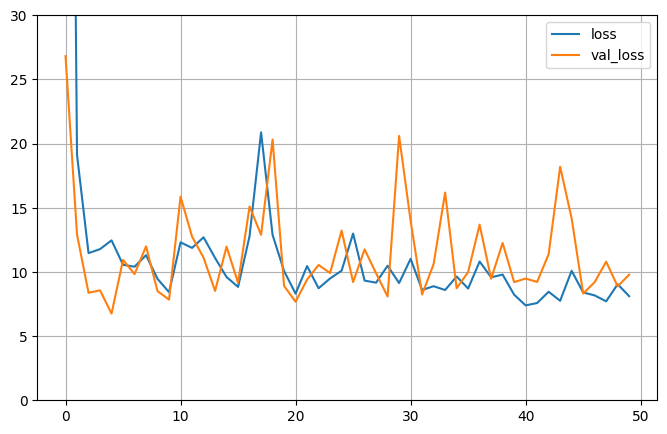

In [99]:
import matplotlib.pyplot as plt

#Data to pandas dataframe
pd.DataFrame(wide_deep_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 30) 
plt.show()

### Cross validation

In [100]:
def build_model(n_hidden, n_neurons, lr,input_shape):
    #Define sequential model
    model = keras.models.Sequential()
    #Input shape
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    #Add hidden layer with loop
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    #Ouput layer    
    model.add(keras.layers.Dense(1))
    #Define optimizer
    optimizer = keras.optimizers.Adam(learning_rate=lr)
    #Compile model
    model.compile(loss="mse", optimizer=optimizer)
    return(model)

In [101]:
#Keras wrapper
keras_reg = KerasRegressor(build_model)

In [102]:
param_distribs = {
"model__n_hidden": [1, 2, 3],
"model__n_neurons":[50,100,200],
"model__lr":  [0.0001, 0.001, 0.1],
"model__input_shape":[X_train_sc.shape[1]],
"epochs":[30],
"batch_size":[24]
}

In [103]:
rnd_search_cv = GridSearchCV(keras_reg, param_distribs,cv=3, scoring='neg_mean_squared_error')
#Fit model with grid search
rnd_search_cv.fit(X_train_sc, y_train)

print(rnd_search_cv.best_params_, rnd_search_cv.best_score_)

Epoch 1/30
9/9 [==============================] - 1s 2ms/step - loss: 613.1203
Epoch 2/30
9/9 [==============================] - 0s 3ms/step - loss: 612.0031
Epoch 3/30
9/9 [==============================] - 0s 2ms/step - loss: 610.8711
Epoch 4/30
9/9 [==============================] - 0s 7ms/step - loss: 609.7517
Epoch 5/30
9/9 [==============================] - 0s 3ms/step - loss: 608.6182
Epoch 6/30
9/9 [==============================] - 0s 5ms/step - loss: 607.4828
Epoch 7/30
9/9 [==============================] - 0s 3ms/step - loss: 606.3525
Epoch 8/30
9/9 [==============================] - 0s 2ms/step - loss: 605.2153
Epoch 9/30
9/9 [==============================] - 0s 2ms/step - loss: 604.0877
Epoch 10/30
9/9 [==============================] - 0s 2ms/step - loss: 602.9385
Epoch 11/30
9/9 [==============================] - 0s 2ms/step - loss: 601.7972
Epoch 12/30
9/9 [==============================] - 0s 2ms/step - loss: 600.6407
Epoch 13/30
9/9 [==============================] 

In [96]:
#import sklearn
#sklearn.metrics.SCORERS.keys()

In [104]:
#Examiner tous les fold par ordre
results_df = pd.DataFrame(rnd_search_cv.cv_results_)
results_df = results_df.sort_values(by=["rank_test_score"])
results_df = results_df.set_index(results_df["params"]\
                                  .apply(lambda x: "_".join(str(val) for val in x.values()))
                                 ).rename_axis("param")

results_df[["params", "rank_test_score", "mean_test_score", "std_test_score"]]

,params,rank_test_score,mean_test_score,std_test_score
param,,,,
24_30_9_0.001_3_200,"{'batch_size': 24, 'epochs': 30, 'model__input...",1,-9.756737,1.050809
24_30_9_0.001_2_200,"{'batch_size': 24, 'epochs': 30, 'model__input...",2,-9.846744,1.131363
24_30_9_0.001_3_100,"{'batch_size': 24, 'epochs': 30, 'model__input...",3,-9.904244,1.373675
24_30_9_0.001_2_100,"{'batch_size': 24, 'epochs': 30, 'model__input...",4,-10.429569,1.082915
24_30_9_0.1_2_200,"{'batch_size': 24, 'epochs': 30, 'model__input...",5,-10.484440,1.413244
24_30_9_0.001_3_50,"{'batch_size': 24, 'epochs': 30, 'model__input...",6,-10.526488,0.755979
24_30_9_0.1_3_50,"{'batch_size': 24, 'epochs': 30, 'model__input...",7,-10.799874,1.479940
24_30_9_0.1_1_200,"{'batch_size': 24, 'epochs': 30, 'model__input...",8,-10.954086,2.243078
24_30_9_0.1_2_100,"{'batch_size': 24, 'epochs': 30, 'model__input...",9,-11.989292,0.633558


In [105]:
opti_model = build_model(n_hidden =3 , n_neurons=200, lr =0.001 ,input_shape= X_train_sc.shape[1])

In [106]:
opti_histori = opti_model.fit(X_train_sc, y_train,batch_size=24 ,epochs=30, validation_split=0.2)

Epoch 1/30
11/11 [==============================] - 1s 34ms/step - loss: 528.9619 - val_loss: 471.6547
Epoch 2/30
11/11 [==============================] - 0s 10ms/step - loss: 244.0714 - val_loss: 61.4002
Epoch 3/30
11/11 [==============================] - 0s 15ms/step - loss: 62.3075 - val_loss: 29.5969
Epoch 4/30
11/11 [==============================] - 0s 12ms/step - loss: 26.5326 - val_loss: 31.4907
Epoch 5/30
11/11 [==============================] - 0s 10ms/step - loss: 17.7443 - val_loss: 18.0586
Epoch 6/30
11/11 [==============================] - 0s 7ms/step - loss: 14.9571 - val_loss: 13.3074
Epoch 7/30
11/11 [==============================] - 0s 7ms/step - loss: 12.4268 - val_loss: 10.1159
Epoch 8/30
11/11 [==============================] - 0s 8ms/step - loss: 11.1076 - val_loss: 9.8510
Epoch 9/30
11/11 [==============================] - 0s 7ms/step - loss: 10.1329 - val_loss: 9.7504
Epoch 10/30
11/11 [==============================] - 0s 7ms/step - loss: 9.6045 - val_loss: 9.

In [1]:
import matplotlib.pyplot as plt

#Data to pandas dataframe
pd.DataFrame(opti_histori.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 30) 
plt.show()

NameError: name 'pd' is not defined

### Classification

In [111]:
#Load fashion mnist
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) =fashion_mnist.load_data()

In [112]:
#Shape
X_train_full.shape

(60000, 28, 28)

In [ ]:
X_train_full.dtype

In [113]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] /255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [114]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]


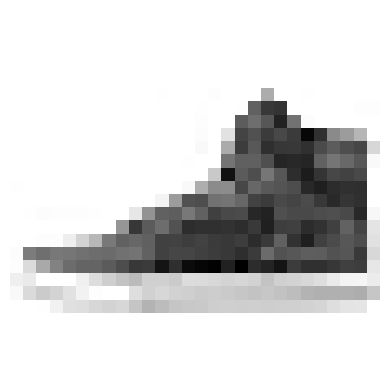

In [116]:
#Afficher une image
plt.imshow(X_train[20], cmap="binary")
plt.axis('off')
plt.show()

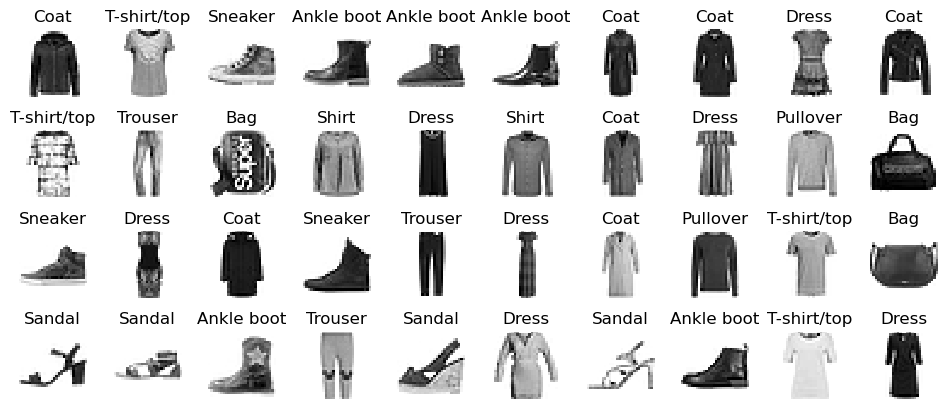

In [117]:
# Afficher un échantillon des images

n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [118]:
#A lancer avant la modélisation pour supprimer les anciens modèles en arrière plan
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [119]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [120]:
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer="sgd",
              metrics=["accuracy"])

In [121]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 15s 8ms/step - loss: 0.7214 - accuracy: 0.7658 - val_loss: 0.5158 - val_accuracy: 0.8294
Epoch 2/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4854 - accuracy: 0.8301 - val_loss: 0.4400 - val_accuracy: 0.8510
Epoch 3/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4402 - accuracy: 0.8444 - val_loss: 0.5246 - val_accuracy: 0.8050
Epoch 4/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4141 - accuracy: 0.8552 - val_loss: 0.3966 - val_accuracy: 0.8660
Epoch 5/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3960 - accuracy: 0.8611 - val_loss: 0.3777 - val_accuracy: 0.8702
Epoch 6/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3781 - accuracy: 0.8665 - val_loss: 0.3754 - val_accuracy: 0.8732
Epoch 7/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3662 - accuracy: 0.8713 - val_loss: 0.3699 - val_accuracy

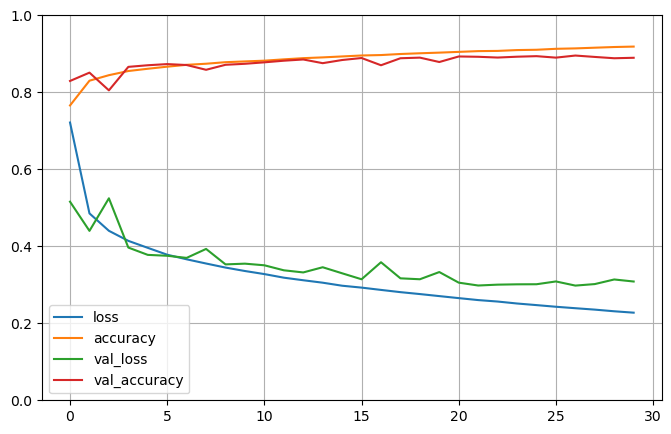

In [122]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [123]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 77.3350 - accuracy: 0.8296


[77.33497619628906, 0.8295999765396118]

In [189]:
X_new = X_test[:12]
y_proba = model.predict(X_new)
print(y_proba)

1/1 [==============================] - 0s 18ms/step
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 1.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.03234363e-19 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00

In [190]:
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

1/1 [==============================] - 0s 20ms/step


array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5], dtype=int64)

In [191]:
name_pred = np.array(class_names)[y_pred]

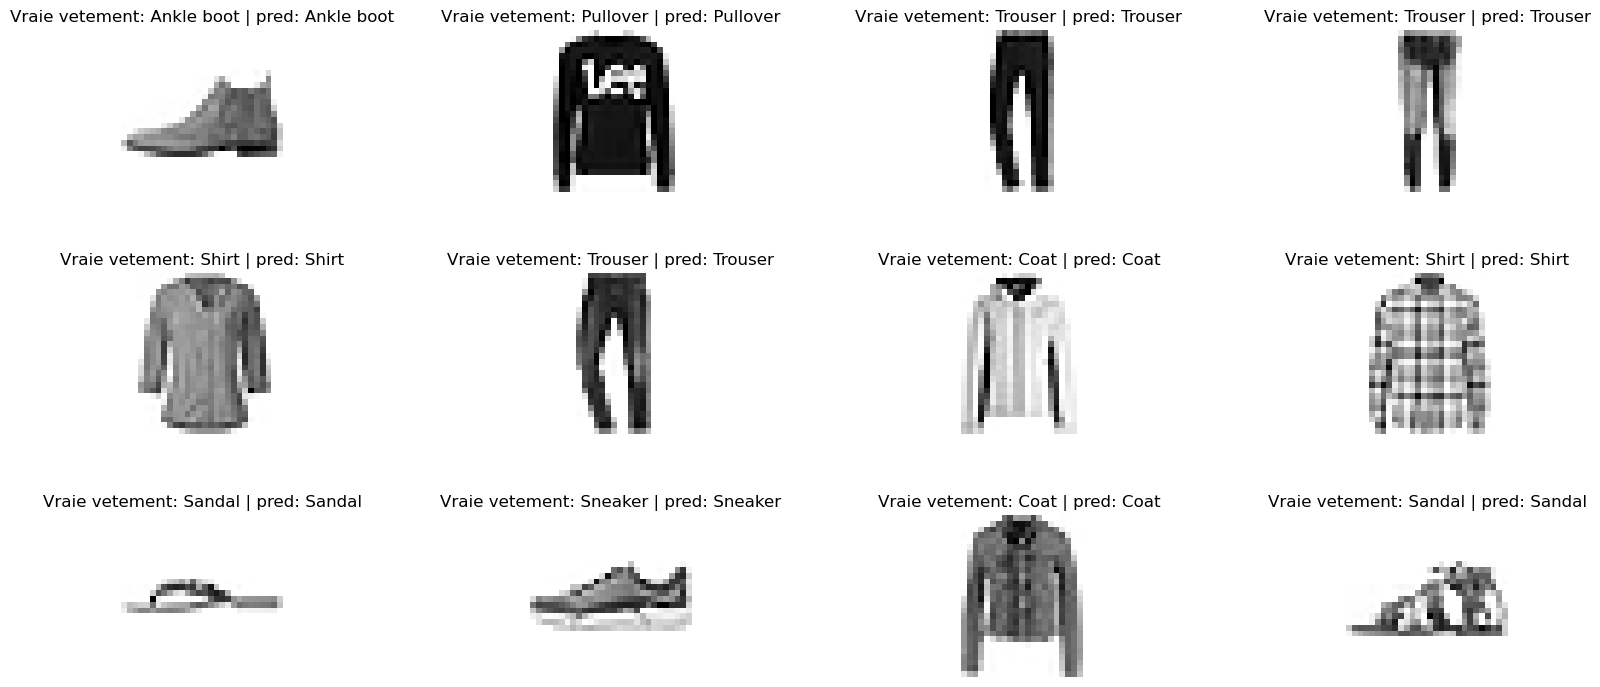

In [192]:
plt.figure(figsize=(20.2, 8.4))
for index, image in enumerate(X_new):
    plt.subplot(3, 4, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title('Vraie vetement: ' + class_names[y_test[index]] + ' | pred: ' +str(name_pred[index]), fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [193]:
y_pred_full = np.argmax(model.predict(X_test), axis=-1)
y_pred_full

313/313 [==============================] - 1s 2ms/step


array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [196]:
np.where(y_pred_full!=y_test)[0][0:10]

array([12, 17, 23, 29, 40, 42, 43, 44, 45, 49], dtype=int64)

In [214]:
def plot_img(choose_img, X) :
    plt.imshow(X[choose_img].reshape(28,28), cmap='gray')
    plt.title("Cette image est :" + str(np.array(class_names)[y_valid][choose_img]) + ' | on predit : ' +str(np.array(class_names)[y_pred_full][choose_img]))

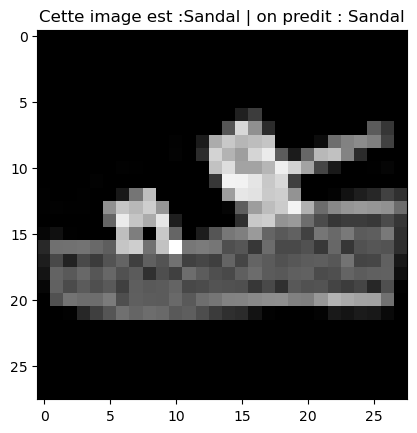

In [216]:
plot_img(choose_img = 12 , X =X_valid )